# In this notebook we randomly select (5, 10, 15, 20) number of seeds as our sample, then plot the kde of the sample and compare it to the kde of all 100 seeds

## imports

In [3]:
# Third-party imports
%matplotlib inline
import json
import matplotlib.pyplot as plt
import yaml
from IPython.display import display


In [4]:
from src.RQ1_forecast import *

In [5]:
pd.options.display.max_columns = None

In [8]:
def plot_kde(arr, conf_name, dataset_name, metric , add_title=False):
    pd.Series(arr).plot.kde(0.5, linewidth=3)
    
    plt.xlabel(metric)
    # plt.title(f'deep{conf_name}_{dataset_name}')
    if(dataset_name == 'electricity'):
        # plt.xlim(-1,12)
        if add_title:
            plt.title('electricity', fontsize=26)
    elif(dataset_name == 'exchange_rate'):
        # plt.xlim(-1,12)
        if add_title:
            plt.title('exchange rate', fontsize=26)
    elif(dataset_name == 'solar_nips'):
        # plt.xlim(-1,12)
        if add_title:
            plt.title('solar nips', fontsize=26)
    elif(dataset_name == 'traffic_nips'):
        # plt.xlim(-1,6)
        if add_title:
            plt.title('traffic nips', fontsize=26)
    plt.savefig(f"/home/dev/deepts/plots/kde_func/kde_{conf_name}_{dataset_name}_{metric}", dpi=900)
    plt.show()


def mape_mean_array_dataset(conf_name, dataset_name, metric='MAPE', add_title=False):
    with open(f'/home/dev/deepts/configs/ks_config_{conf_name}.yaml', "r") as f:
            config = yaml.load(f, Loader=yaml.FullLoader)
    data_address_val=config[dataset_name]

    metrics_list1_val = read_csv_result('metrics.csv', data_address_val)
    mape_dataset = np.zeros(len(metrics_list1_val))
    for idx, metric_elem in enumerate(metrics_list1_val):
        mape_dataset[idx] = metric_elem[metric].mean()
    plot_kde(mape_dataset, conf_name=conf_name, dataset_name=dataset_name, metric=metric, add_title=add_title)
    return mape_dataset

## plot the kde of all experiments for 100 seeds

# Deepstate

## MAPE

101it [00:00, 10671.99it/s]
100%|##########| 100/100 [00:00<00:00, 117.56it/s]


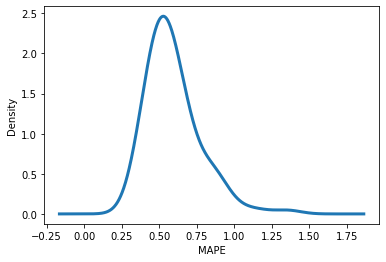

101it [00:00, 36833.73it/s]
100%|##########| 100/100 [00:00<00:00, 414.66it/s]


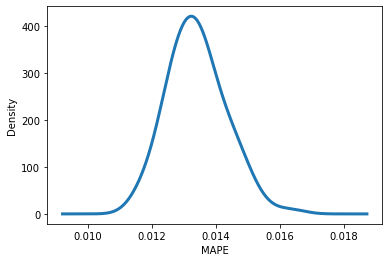

101it [00:00, 36506.78it/s]
100%|###########| 100/100 [00:02<00:00, 44.68it/s]


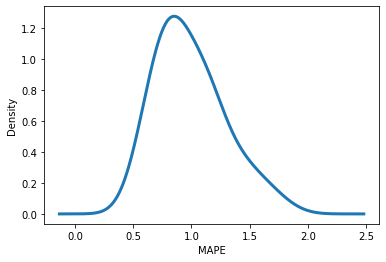

101it [00:00, 38455.40it/s]
100%|##########| 100/100 [00:00<00:00, 162.37it/s]


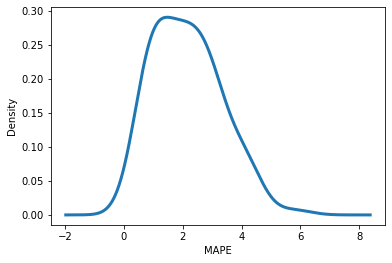

In [9]:
print('mape score deepts')
deepstate_mape_elec_arr = mape_mean_array_dataset(conf_name = 'state', dataset_name = "electricity")
deepstate_mape_exch_arr = mape_mean_array_dataset(conf_name = 'state', dataset_name = "exchange_rate")
deepstate_mape_traf_arr = mape_mean_array_dataset(conf_name = 'state', dataset_name = "traffic_nips")
deepstate_mape_sola_arr = mape_mean_array_dataset(conf_name = 'state', dataset_name = "solar_nips")

## MASE

101it [00:00, 37598.71it/s]
100%|##########| 100/100 [00:00<00:00, 117.81it/s]


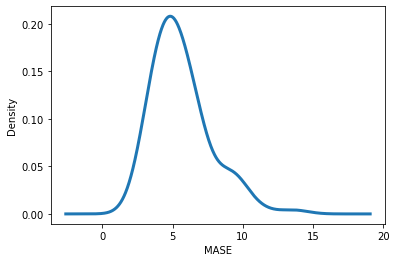

101it [00:00, 37837.15it/s]
100%|##########| 100/100 [00:00<00:00, 418.23it/s]


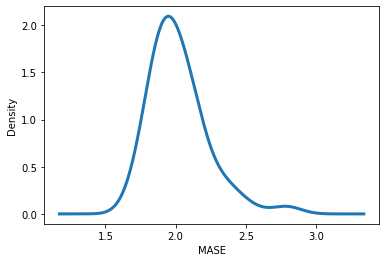

101it [00:00, 38337.08it/s]
100%|###########| 100/100 [00:01<00:00, 51.00it/s]


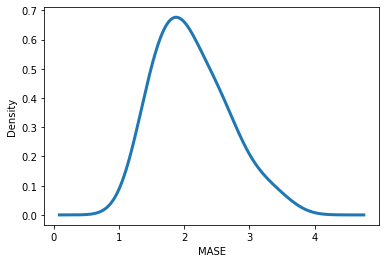

101it [00:00, 36878.62it/s]
100%|##########| 100/100 [00:00<00:00, 199.87it/s]


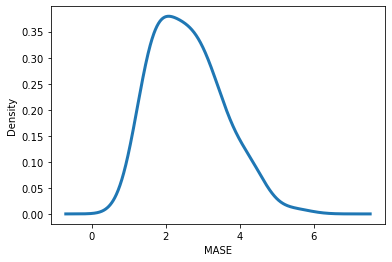

In [10]:
print('mase score deepts')
deepstate_mase_elec_arr = mape_mean_array_dataset(conf_name = 'state', dataset_name = "electricity", metric='MASE')
deepstate_mase_exch_arr = mape_mean_array_dataset(conf_name = 'state', dataset_name = "exchange_rate", metric='MASE')
deepstate_mase_traf_arr = mape_mean_array_dataset(conf_name = 'state', dataset_name = "traffic_nips", metric='MASE')
deepstate_mase_sola_arr = mape_mean_array_dataset(conf_name = 'state', dataset_name = "solar_nips", metric='MASE')


# DeepAR

## MAPE

101it [00:00, 33269.83it/s]
100%|##########| 100/100 [00:00<00:00, 131.65it/s]


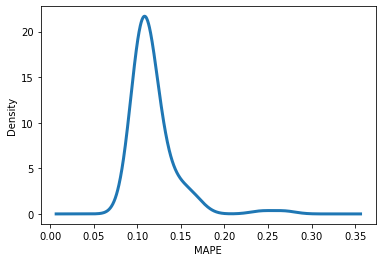

201it [00:00, 45289.02it/s]
100%|##########| 100/100 [00:00<00:00, 421.91it/s]


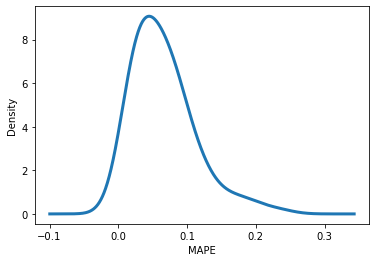

101it [00:00, 38779.27it/s]
100%|###########| 100/100 [00:01<00:00, 57.07it/s]


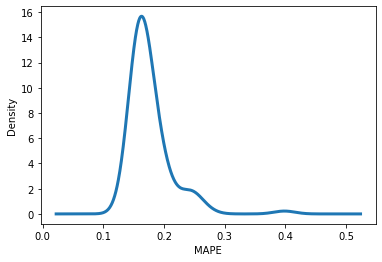

201it [00:00, 46248.02it/s]
100%|##########| 100/100 [00:00<00:00, 194.26it/s]


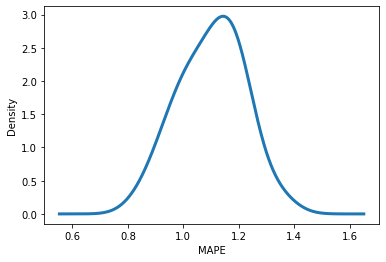

In [12]:
deepar_mape_elec_arr = mape_mean_array_dataset(conf_name = 'ar', dataset_name = "electricity")
deepar_mape_exch_arr = mape_mean_array_dataset(conf_name = 'ar', dataset_name = "exchange_rate")
deepar_mape_traf_arr = mape_mean_array_dataset(conf_name = 'ar', dataset_name = "traffic_nips")
deepar_mape_sola_arr = mape_mean_array_dataset(conf_name = 'ar', dataset_name = "solar_nips")

## MASE

101it [00:00, 39007.80it/s]
100%|##########| 100/100 [00:00<00:00, 130.32it/s]


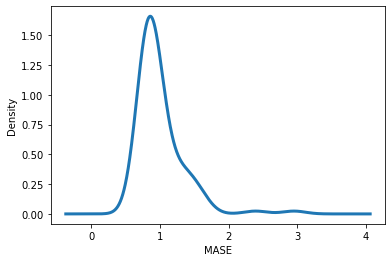

201it [00:00, 39770.50it/s]
100%|##########| 100/100 [00:00<00:00, 416.45it/s]


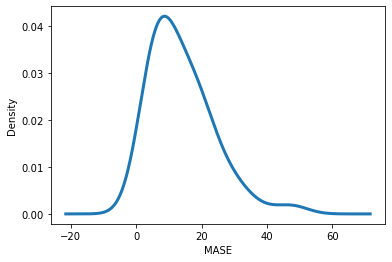

101it [00:00, 37983.03it/s]
100%|###########| 100/100 [00:01<00:00, 51.43it/s]


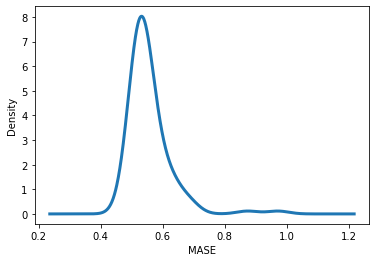

201it [00:00, 45047.03it/s]
100%|##########| 100/100 [00:00<00:00, 203.76it/s]


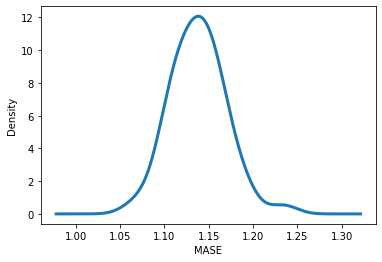

In [13]:
deepar_mape_elec_arr = mape_mean_array_dataset(conf_name = 'ar', dataset_name = "electricity", metric='MASE')
deepar_mape_exch_arr = mape_mean_array_dataset(conf_name = 'ar', dataset_name = "exchange_rate", metric='MASE')
deepar_mape_traf_arr = mape_mean_array_dataset(conf_name = 'ar', dataset_name = "traffic_nips", metric='MASE')
deepar_mape_sola_arr = mape_mean_array_dataset(conf_name = 'ar', dataset_name = "solar_nips", metric='MASE')

# DeepFactor

## MAPE

101it [00:00, 35673.66it/s]
100%|##########| 100/100 [00:00<00:00, 134.11it/s]


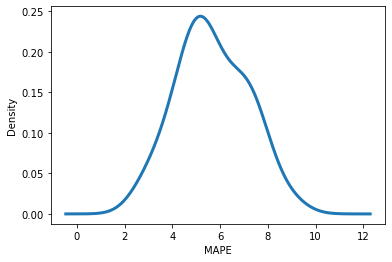

101it [00:00, 40176.85it/s]
100%|##########| 100/100 [00:00<00:00, 415.32it/s]


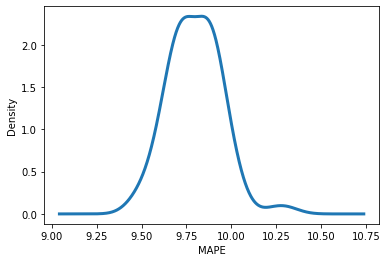

101it [00:00, 35068.27it/s]
100%|###########| 100/100 [00:01<00:00, 58.03it/s]


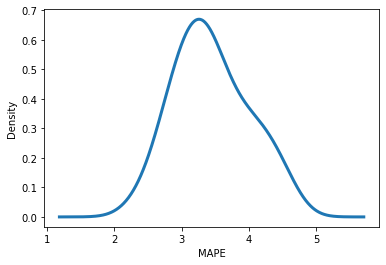

101it [00:00, 35676.66it/s]
100%|##########| 100/100 [00:00<00:00, 186.68it/s]


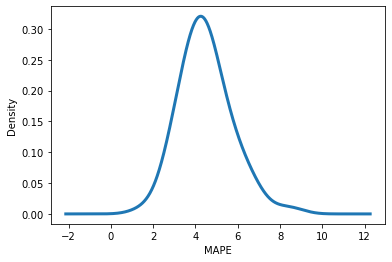

In [14]:
deepfactor_mape_elec_arr = mape_mean_array_dataset(conf_name = 'factor', dataset_name = "electricity")
deepfactor_mape_exch_arr = mape_mean_array_dataset(conf_name = 'factor', dataset_name = "exchange_rate")
deepfactor_mape_traf_arr = mape_mean_array_dataset(conf_name = 'factor', dataset_name = "traffic_nips")
deepfactor_mape_sola_arr = mape_mean_array_dataset(conf_name = 'factor', dataset_name = "solar_nips")

## MASE

101it [00:00, 36891.47it/s]
100%|##########| 100/100 [00:00<00:00, 132.33it/s]


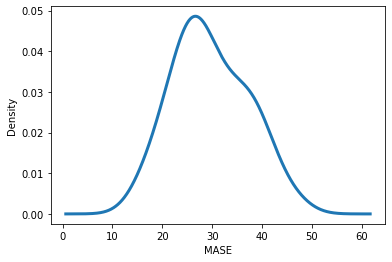

101it [00:00, 34086.31it/s]
100%|##########| 100/100 [00:00<00:00, 392.23it/s]


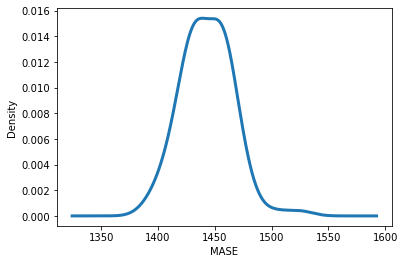

101it [00:00, 40843.11it/s]
100%|###########| 100/100 [00:01<00:00, 57.12it/s]


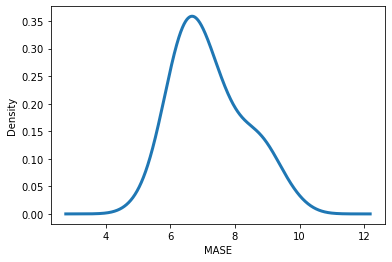

101it [00:00, 38500.84it/s]
100%|##########| 100/100 [00:00<00:00, 200.56it/s]


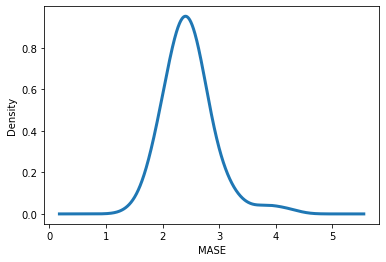

In [15]:
deepfactor_mape_elec_arr = mape_mean_array_dataset(conf_name = 'factor', dataset_name = "electricity", metric='MASE')
deepfactor_mape_exch_arr = mape_mean_array_dataset(conf_name = 'factor', dataset_name = "exchange_rate", metric='MASE')
deepfactor_mape_traf_arr = mape_mean_array_dataset(conf_name = 'factor', dataset_name = "traffic_nips", metric='MASE')
deepfactor_mape_sola_arr = mape_mean_array_dataset(conf_name = 'factor', dataset_name = "solar_nips", metric='MASE')

# NBEATS

## MAPE

101it [00:00, 30606.51it/s]
100%|##########| 100/100 [00:00<00:00, 108.37it/s]


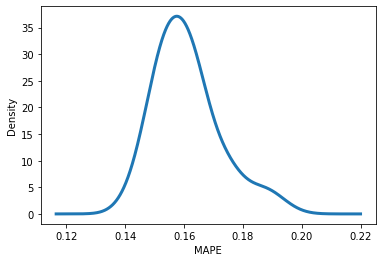

101it [00:00, 40230.27it/s]
100%|##########| 100/100 [00:00<00:00, 409.52it/s]


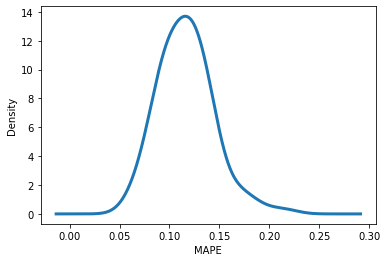

101it [00:00, 25221.76it/s]
100%|###########| 100/100 [00:01<00:00, 52.96it/s]


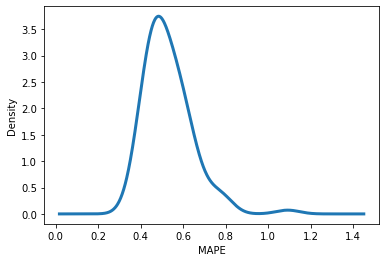

101it [00:00, 40433.78it/s]
100%|##########| 100/100 [00:00<00:00, 197.78it/s]


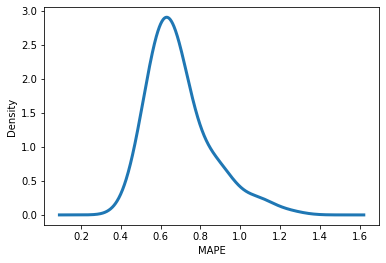

In [16]:
nbeats_mape_elec_arr = mape_mean_array_dataset(conf_name = 'nbeats', dataset_name = "electricity")
nbeats_mape_exch_arr = mape_mean_array_dataset(conf_name = 'nbeats', dataset_name = "exchange_rate")
nbeat_mape_traf_arr = mape_mean_array_dataset(conf_name = 'nbeats', dataset_name = "traffic_nips")
nbeat_mape_sola_arr = mape_mean_array_dataset(conf_name = 'nbeats', dataset_name = "solar_nips")

## MASE

101it [00:00, 16434.21it/s]
100%|##########| 100/100 [00:00<00:00, 130.03it/s]


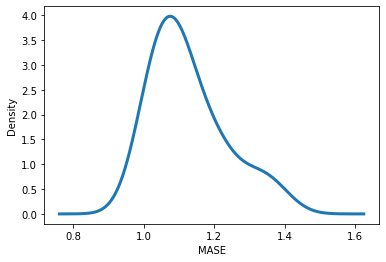

101it [00:00, 37445.83it/s]
100%|##########| 100/100 [00:00<00:00, 406.27it/s]


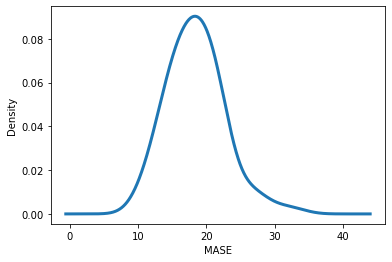

101it [00:00, 37615.41it/s]
100%|###########| 100/100 [00:01<00:00, 53.70it/s]


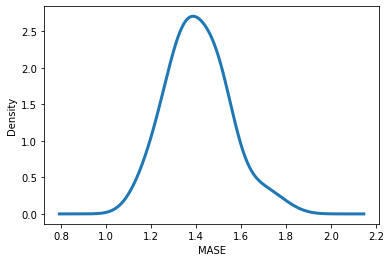

101it [00:00, 38662.47it/s]
100%|##########| 100/100 [00:00<00:00, 188.95it/s]


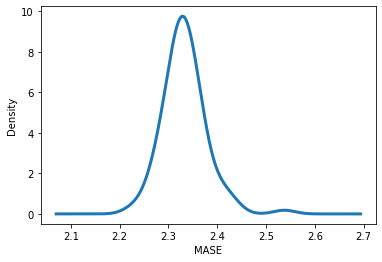

In [17]:
nbeats_mape_elec_arr = mape_mean_array_dataset(conf_name = 'nbeats', dataset_name = "electricity", metric='MASE')
nbeats_mape_exch_arr = mape_mean_array_dataset(conf_name = 'nbeats', dataset_name = "exchange_rate", metric='MASE')
nbeat_mape_traf_arr = mape_mean_array_dataset(conf_name = 'nbeats', dataset_name = "traffic_nips", metric='MASE')
nbeat_mape_sola_arr = mape_mean_array_dataset(conf_name = 'nbeats', dataset_name = "solar_nips", metric='MASE')

# plot kde for NBEATS solar nips using batch and weight increase

101it [00:00, 8247.98it/s]
100%|##########| 100/100 [00:00<00:00, 186.58it/s]


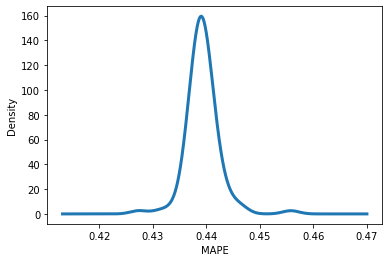

101it [00:00, 28389.27it/s]
100%|##########| 100/100 [00:00<00:00, 198.44it/s]


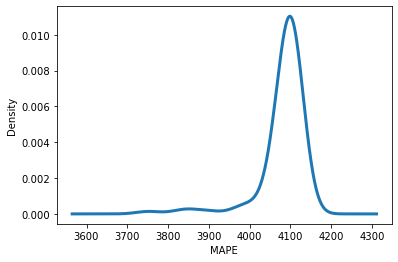

101it [00:00, 28379.76it/s]
100%|##########| 100/100 [00:00<00:00, 203.60it/s]


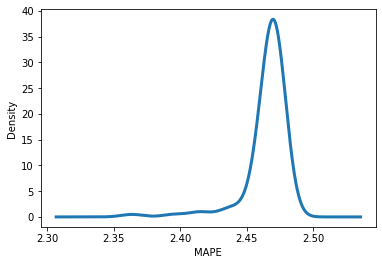

In [14]:
nbeat_mape_sola_arr_both_p10 = mape_mean_array_dataset(conf_name = 'nbeats', dataset_name = "solar_nips_both_p10", metric='MAPE')
nbeat_mse_sola_arr_both_p10 = mape_mean_array_dataset(conf_name = 'nbeats', dataset_name = "solar_nips_both_p10", metric='MSE')
nbeat_mase_sola_arr_both_p10 = mape_mean_array_dataset(conf_name = 'nbeats', dataset_name = "solar_nips_both_p10", metric='MASE')

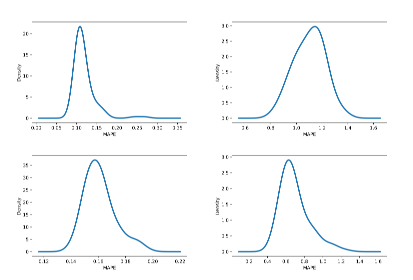

In [25]:
# a function to get all the plots together
def get_collect_images(modelName_list_val, datasetName_list_val, metric_val):
    """
    this function returns all the kde of a all of datasets for one model, 
    model should be a string:
        deepar = ar, deepfactor = factor, deepstate = state, nbeats = nbeats
    """
    row_list = []
    for model in modelName_list:
        col_list = []
        for dataset in datasetName_list:
            deep_elec = plt.imread(f"/home/dev/deepts/plots/kde_func/kde_{model}_{dataset}_{metric_val}.png")
            col_list.append(deep_elec)
        row_val = np.hstack(col_list)
        row_list.append(row_val)
    # append all the rows to get a numpy array
    return np.vstack(row_list)


modelName_list = ['ar', 'nbeats']
datasetName_list = ['electricity', 'solar_nips']
collect_plot_array = get_collect_images(modelName_list_val=modelName_list, datasetName_list_val=datasetName_list,                                            metric_val= 'MAPE')


figure = plt.Figure(figsize=(20, 20))
plt.imshow(collect_plot_array)
plt.axis("off")
plt.tight_layout()
plt.savefig("/home/dev/deepts/plots/kde_func/collect.png", dpi=1000)


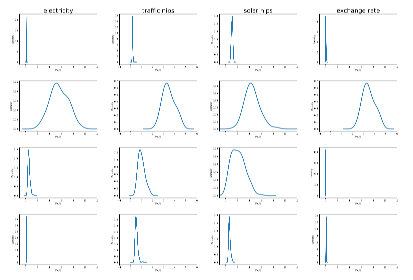

In [10]:





figure = plt.Figure(figsize=(20, 20))
deepar_elec = plt.imread("/home/dev/deepts/plot1/kde_func/kde_ar_electricity.png")
deepar_exch = plt.imread("/home/dev/deepts/plot1/kde_func/kde_ar_exchange_rate.png")
deepar_sola = plt.imread("/home/dev/deepts/plot1/kde_func/kde_ar_solar_nips.png")
deepar_traf = plt.imread("/home/dev/deepts/plot1/kde_func/kde_ar_traffic_nips.png")

deepfactor_elec = plt.imread("/home/dev/deepts/plot1/kde_func/kde_factor_electricity.png")
deepfactor_exch = plt.imread("/home/dev/deepts/plot1/kde_func/kde_factor_traffic_nips.png")
deepfactor_sola = plt.imread("/home/dev/deepts/plot1/kde_func/kde_factor_solar_nips.png")
deepfactor_traf = plt.imread("/home/dev/deepts/plot1/kde_func/kde_factor_traffic_nips.png")

deepstate_elec = plt.imread("/home/dev/deepts/plot1/kde_func/kde_state_electricity.png")
deepstate_exch = plt.imread("/home/dev/deepts/plot1/kde_func/kde_state_exchange_rate.png")
deepstate_sola = plt.imread("/home/dev/deepts/plot1/kde_func/kde_state_solar_nips.png")
deepstate_traf = plt.imread("/home/dev/deepts/plot1/kde_func/kde_state_traffic_nips.png")

nbeats_elec = plt.imread("/home/dev/deepts/plot1/kde_func/kde_nbeats_electricity.png")
nbeats_exch = plt.imread("/home/dev/deepts/plot1/kde_func/kde_nbeats_exchange_rate.png")
nbeats_sola = plt.imread("/home/dev/deepts/plot1/kde_func/kde_nbeats_solar_nips.png")
nbeats_traf = plt.imread("/home/dev/deepts/plot1/kde_func/kde_nbeats_traffic_nips.png")

# deepstate = plt.imread("/home/dev/deepts/plots/deepstate.png")
# nbeats = plt.imread("/home/dev/deepts/plots/nbeats.png")

# hpad = np.zeros((deepar_elec.shape[0], 75, deepar_elec.shape[-1]))
 
row1 = np.hstack([deepar_elec, deepar_traf, deepar_sola, deepar_exch])
row2 = np.hstack([deepfactor_elec, deepfactor_traf, deepfactor_sola, deepfactor_exch])
row3 = np.hstack([deepstate_elec, deepstate_traf, deepstate_sola, deepstate_exch])
row4 = np.hstack([nbeats_elec, nbeats_traf, nbeats_sola, nbeats_exch])

 
# vpad = np.zeros((0, row1.shape[1], deepar_elec.shape[-1]))
 
plt.imshow(np.vstack([row1, row2, row3, row4]))
plt.axis("off")
plt.tight_layout()
plt.savefig("/home/dev/deepts/plot1/kde_func/all_modes.png", dpi=1000)



## Sample randomly from the 100 seeds (5, 10, 15, 20) times

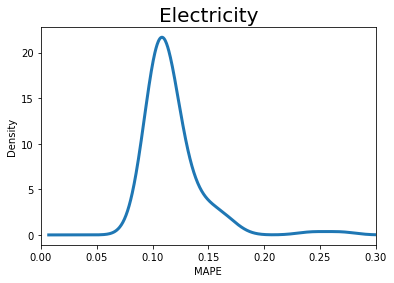

In [11]:
## deepar electricity
pd.Series(deepar_mape_elec_arr).plot.kde(0.5, linewidth=3)
plt.title('Electricity', fontsize=20)
plt.xlabel('MAPE')
plt.xlim(0,0.3)
plt.show()


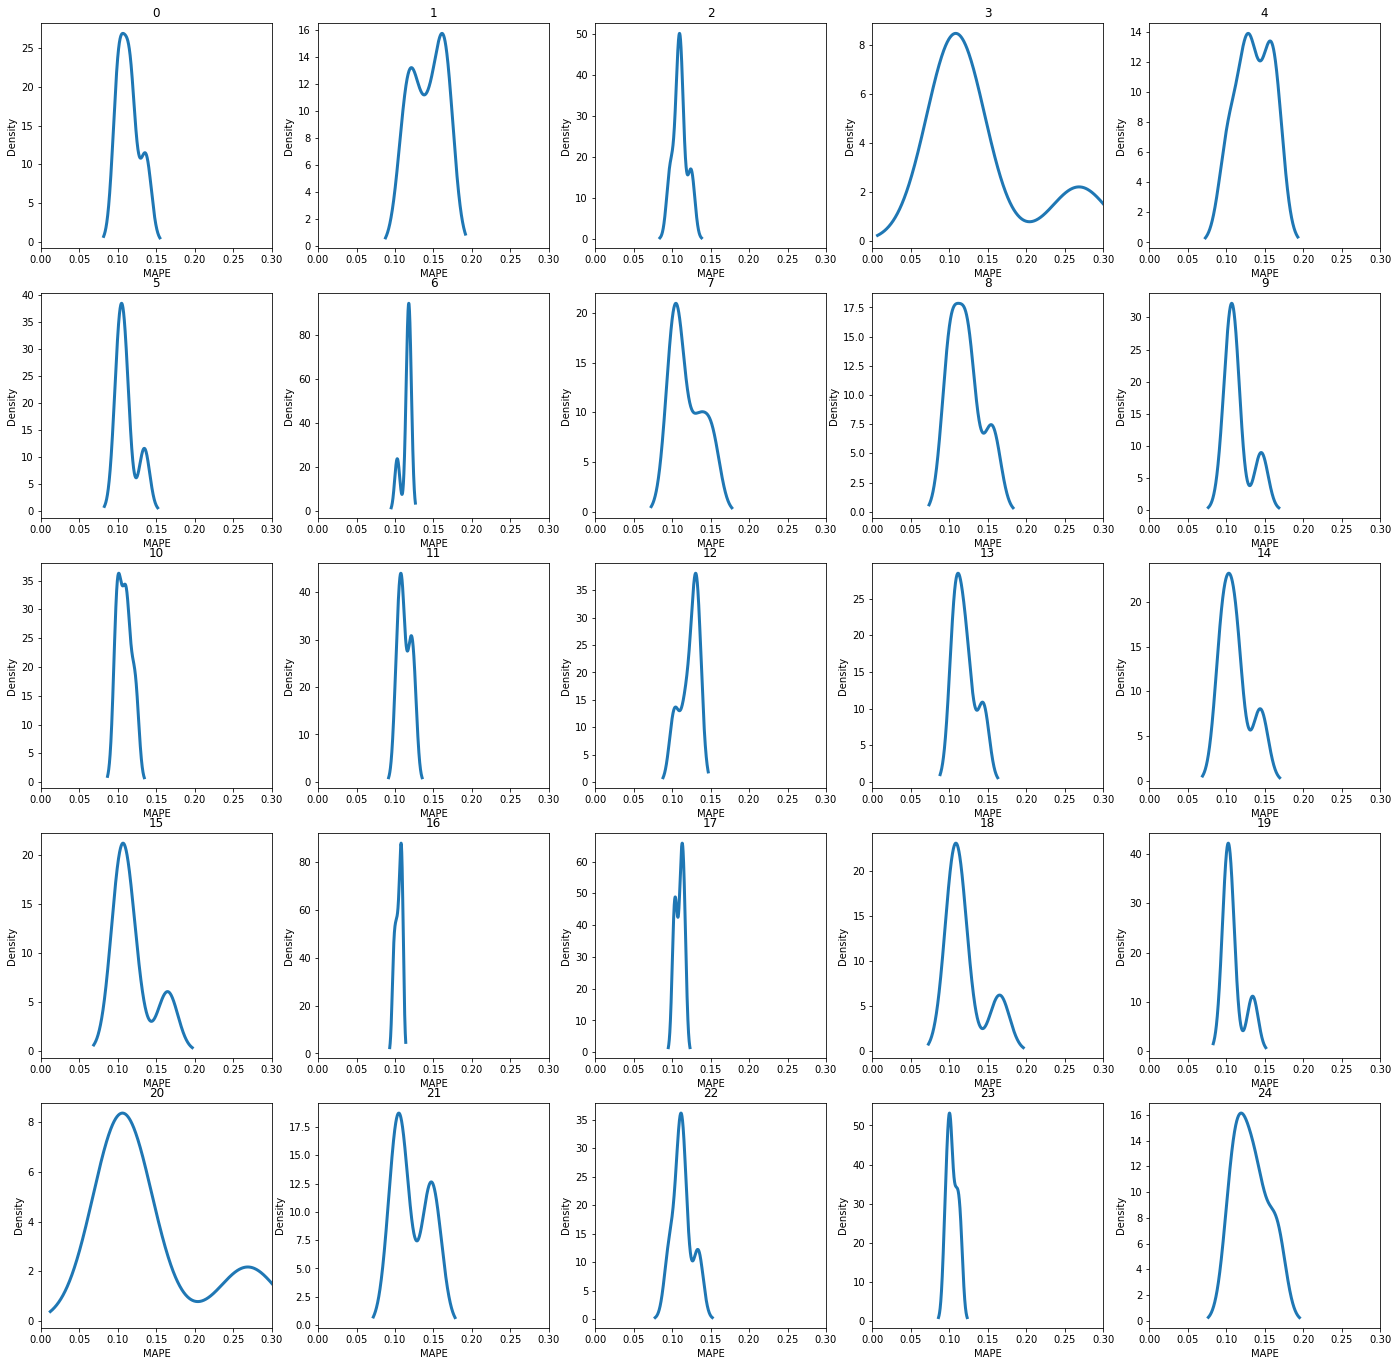

In [111]:
from numpy import random

seed_number = 5
# five seeds
rand_5 = []
fig, axs = plt.subplots(5, 5, figsize=(24,24))
for i, ax in enumerate(axs.flat):
    rand_idx = random.randint(0, 99, size=seed_number)
    pd.Series(deepar_mape_elec_arr[rand_idx]).plot.kde(0.5, ax=ax, linewidth=3)
    ax.set_xlabel('MAPE')
    ax.set_xlim(0,0.3)
    ax.set_title(i)
    rand_5.append(rand_idx)

(0.0, 0.3)

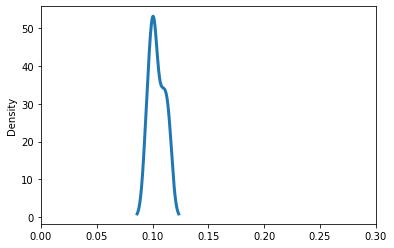

In [112]:
pd.Series(deepar_mape_elec_arr[rand_5[23]]).plot.kde(0.5, linewidth=3)
plt.xlim(0,0.3)

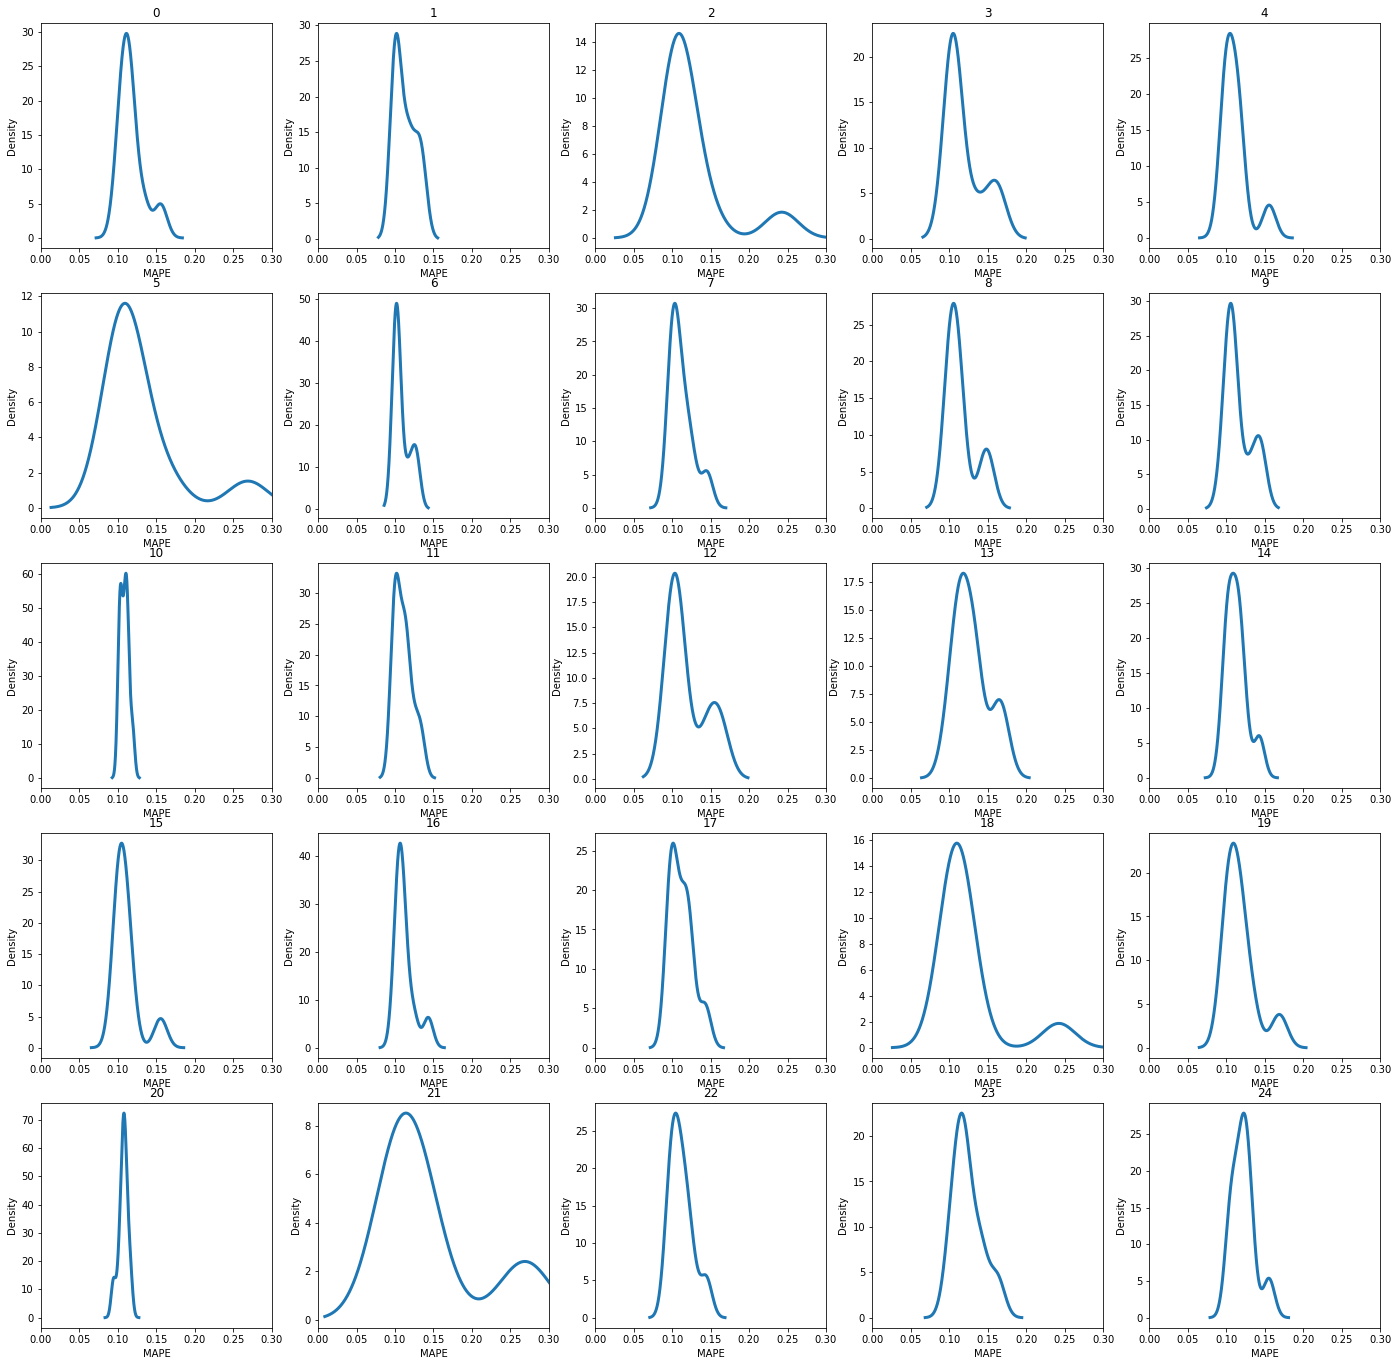

In [129]:
seed_number = 10
# five seeds
rand_10 = []
fig, axs = plt.subplots(5, 5, figsize=(24,24))
for i, ax in enumerate(axs.flat):
    rand_idx = random.randint(0, 99, size=seed_number)
    pd.Series(deepar_mape_elec_arr[rand_idx]).plot.kde(0.5, ax=ax, linewidth=3)
    ax.set_xlabel('MAPE')
    ax.set_xlim(0,0.3)
    ax.set_title(i)
    rand_10.append(rand_idx)

(0.0, 0.3)

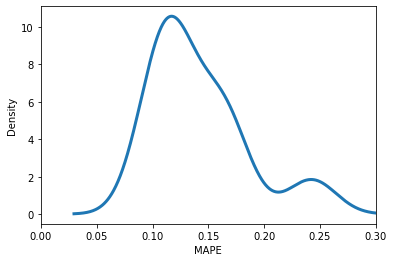

In [114]:
pd.Series(deepar_mape_elec_arr[rand_10[2]]).plot.kde(0.5, linewidth=3)
plt.xlabel('MAPE')
plt.xlim(0,0.3)

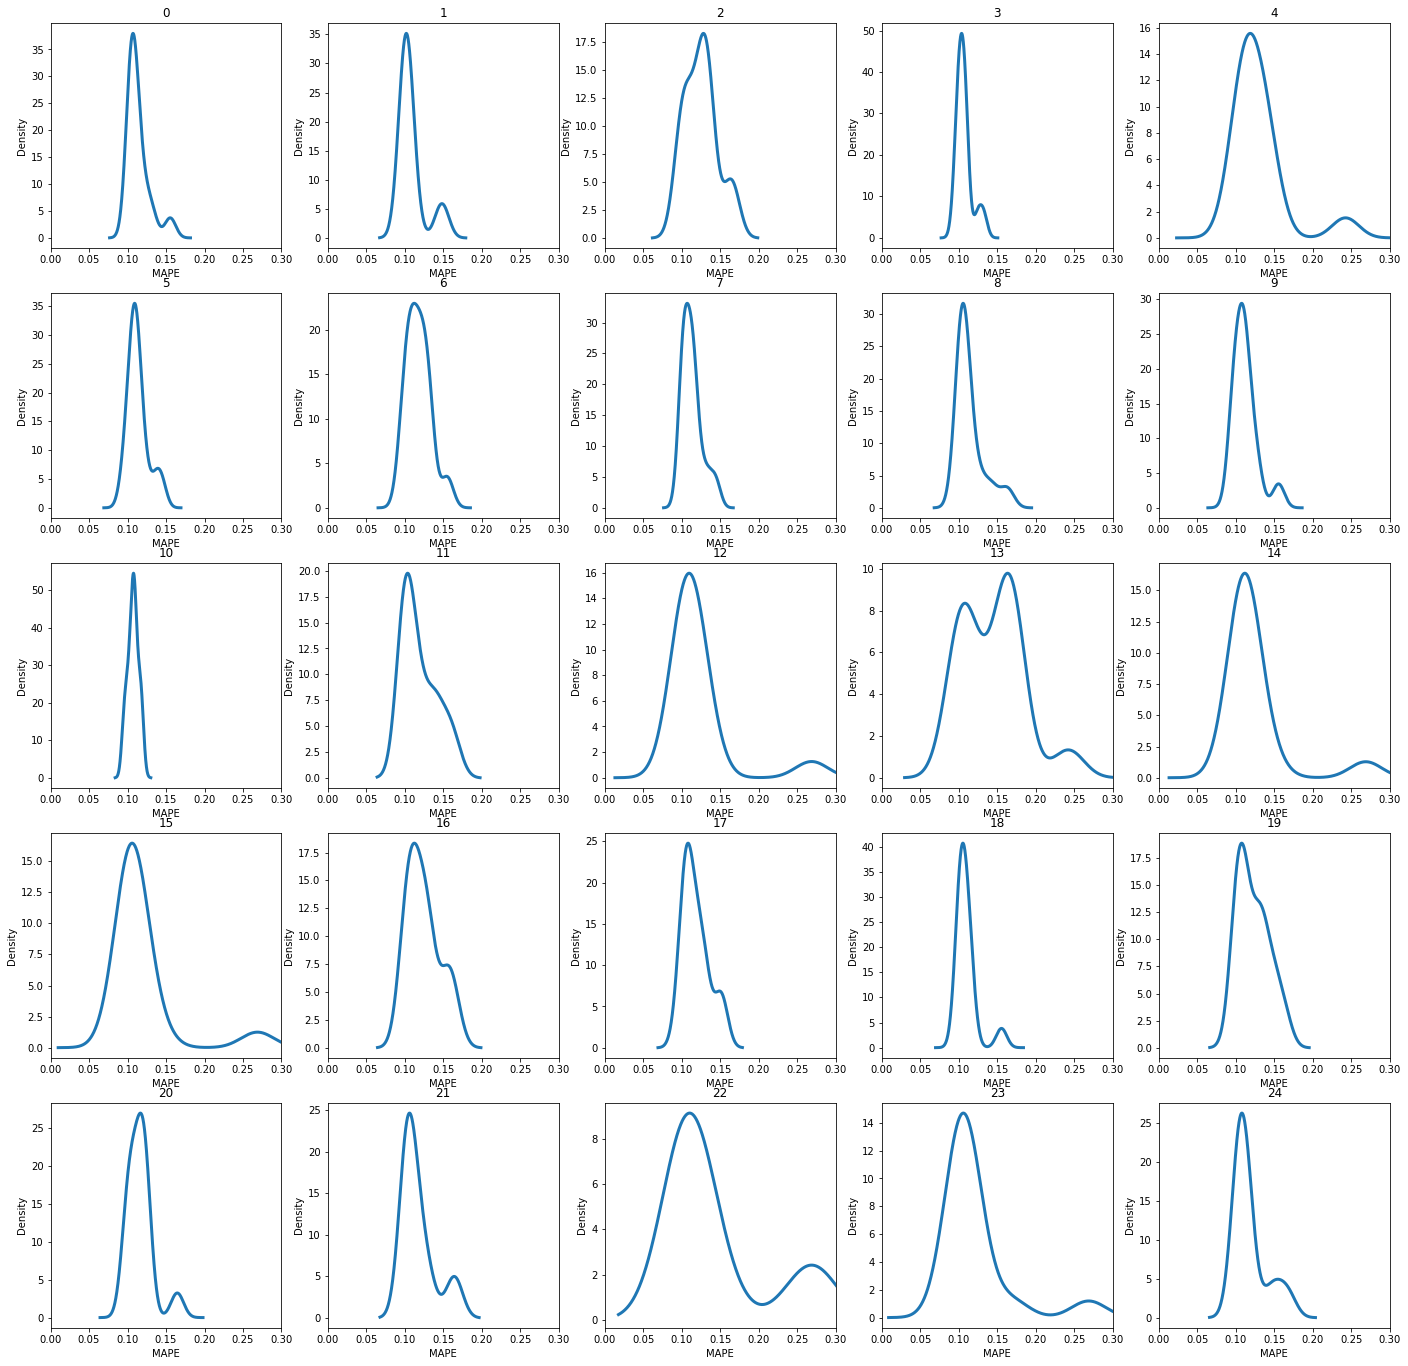

In [127]:
seed_number = 15
# 15 seeds
rand_15 = []
fig, axs = plt.subplots(5, 5, figsize=(24,24))
for i, ax in enumerate(axs.flat):
    rand_idx = random.randint(0, 99, size=seed_number)
    pd.Series(deepar_mape_elec_arr[rand_idx]).plot.kde(0.5, ax=ax, linewidth=3)
    ax.set_xlabel('MAPE')
    ax.set_xlim(0,0.3)
    ax.set_title(i)
    rand_15.append(rand_idx)

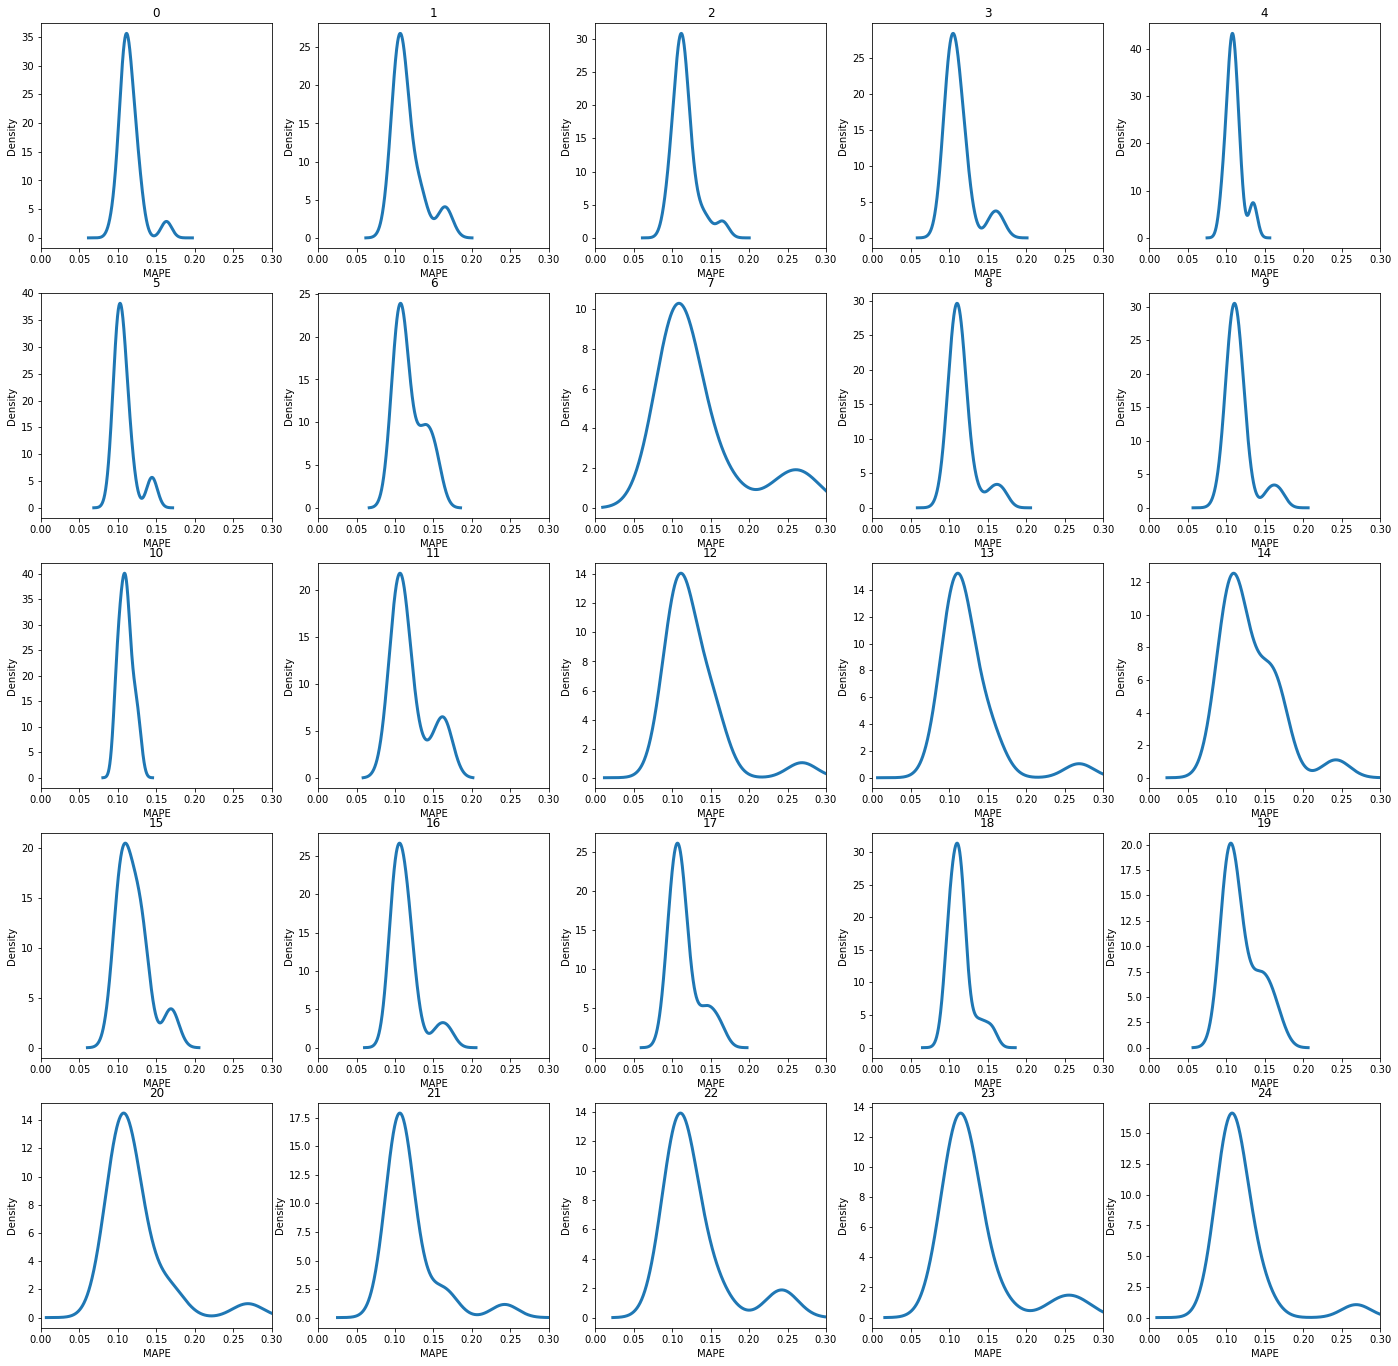

In [128]:
seed_number = 20
# five seeds
rand_20 = []
fig, axs = plt.subplots(5, 5, figsize=(24,24))
for i, ax in enumerate(axs.flat):
    rand_idx = random.randint(0, 99, size=seed_number)
    pd.Series(deepar_mape_elec_arr[rand_idx]).plot.kde(0.5, ax=ax, linewidth=3)
    ax.set_xlabel('MAPE')
    ax.set_xlim(0,0.3)
    ax.set_title(i)
    rand_20.append(rand_idx)

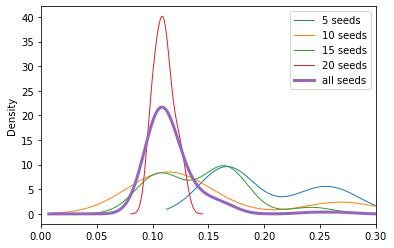

In [132]:
worst5 = np.array([97,75, 17,90, 48])
pd.Series(deepar_mape_elec_arr[worst5]).plot.kde(0.5, linewidth=1, label='5 seeds')
pd.Series(deepar_mape_elec_arr[rand_10[21]]).plot.kde(0.5, linewidth=1, label='10 seeds')
pd.Series(deepar_mape_elec_arr[rand_15[13]]).plot.kde(0.5, linewidth=1, label='15 seeds')
pd.Series(deepar_mape_elec_arr[rand_20[10]]).plot.kde(0.5, linewidth=1, label='20 seeds')
pd.Series(deepar_mape_elec_arr).plot.kde(0.5, linewidth=3, label='all seeds')
plt.xlim(0,0.3)
ax.set_xlabel('MAPE')
plt.legend()
plt.savefig('/home/dev/deepts/plot1/kde_func/kde_sample_seeds/kde_sampling7.png')


## plot the worst 5, 10 , 15, 20 seeds

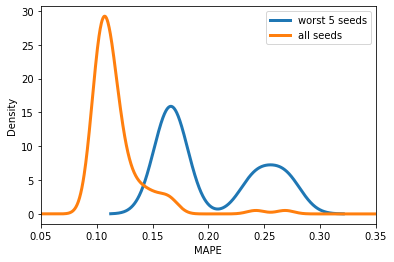

In [218]:
# worst 5
rand_idx = np.array([97,75, 17,90, 48])
pd.Series(deepar_mape_elec_arr[rand_idx]).plot.kde(0.3, linewidth=3, label='worst 5 seeds')
pd.Series(deepar_mape_elec_arr).plot.kde(0.3, linewidth=3, label='all seeds')
plt.xlim(0.05, 0.35)
plt.xlabel('MAPE')
plt.legend()
plt.savefig('/home/dev/deepts/plot1/kde_func/kde_sample_seeds/kde_worst5.png', dpi=300)
plt.show()


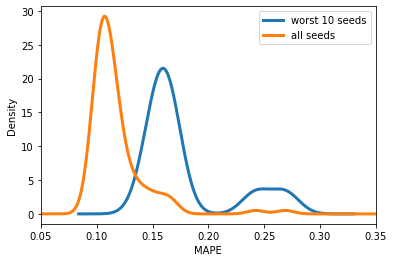

In [219]:
# worst 10
rand_idx = np.array([97, 75, 17, 90, 48, 43, 88, 11, 64, 84])
pd.Series(deepar_mape_elec_arr[rand_idx]).plot.kde(0.3, linewidth=3, label='worst 10 seeds')
pd.Series(deepar_mape_elec_arr).plot.kde(0.3, linewidth=3, label='all seeds')
plt.xlim(0.05, 0.35)
plt.xlabel('MAPE')
plt.legend()
plt.savefig('/home/dev/deepts/plot1/kde_func/kde_sample_seeds/kde_worst10.png', dpi=300)
plt.show()

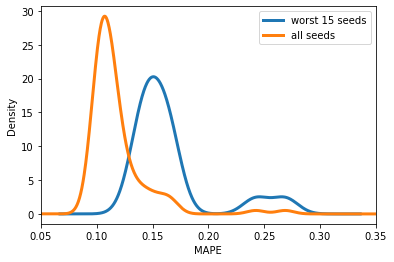

In [220]:
# worst 15
rand_idx = np.array([97, 75, 17, 90, 48, 43, 88, 11, 64, 84, 93, 68, 15, 10, 13])
pd.Series(deepar_mape_elec_arr[rand_idx]).plot.kde(0.3, linewidth=3, label='worst 15 seeds')
pd.Series(deepar_mape_elec_arr).plot.kde(0.3, linewidth=3, label='all seeds')
plt.xlim(0.05, 0.35)
plt.xlabel('MAPE')
plt.legend()
plt.savefig('/home/dev/deepts/plot1/kde_func/kde_sample_seeds/kde_worst15.png', dpi=300)
plt.show()

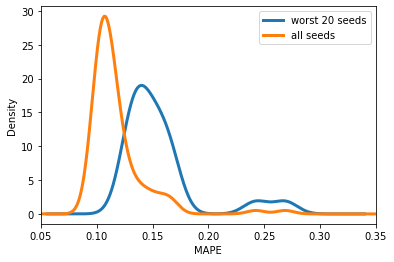

In [221]:
# worst 20
rand_idx = np.array([97, 75, 17, 90, 48, 43, 88, 11, 64, 84, 93, 68, 15, 10, 13, 56, 35, 9, 31, 95])
pd.Series(deepar_mape_elec_arr[rand_idx]).plot.kde(0.3, linewidth=3, label='worst 20 seeds')
pd.Series(deepar_mape_elec_arr).plot.kde(0.3, linewidth=3, label='all seeds')
plt.xlim(0.05, 0.35)
plt.xlabel('MAPE')
plt.legend()
plt.savefig('/home/dev/deepts/plot1/kde_func/kde_sample_seeds/kde_worst20.png', dpi=300)
# plt.show()

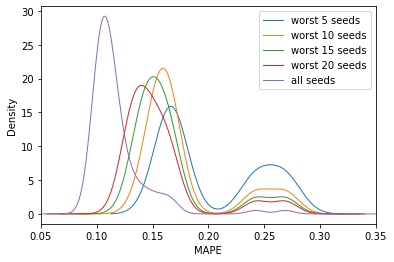

In [225]:
rand_idx = np.array([97, 75, 17, 90, 48, 43, 88, 11, 64, 84, 93, 68, 15, 10, 13, 56, 35,
        9, 31, 95, 40, 18, 49, 79, 38,  5, 99, 98, 78,  6, 12, 69, 67, 80,
       94, 29, 71, 34, 58, 54, 74, 19, 53, 24, 46, 33, 66, 16, 26, 73, 76,
       65,  2, 51, 20, 55, 22,  3, 60, 72, 70, 42,  0, 45, 23, 39, 63,  4,
       36, 50, 47, 27,  1, 91, 81, 89, 41, 57, 25, 44, 28, 83, 52, 14, 21,
       85, 92,  7, 87, 82, 59, 77, 86, 62,  8, 30, 61, 37, 32, 96])
for i in range(5, 21, 5):
    pd.Series(deepar_mape_elec_arr[rand_idx[:i]]).plot.kde(0.3, linewidth=1, label=f'worst {i} seeds')
pd.Series(deepar_mape_elec_arr).plot.kde(0.3, linewidth=1, label='all seeds')
plt.xlabel('MAPE')
plt.legend()
plt.xlim(0.05, 0.35)
plt.savefig('/home/dev/deepts/plot1/kde_func/kde_sample_seeds/kde_worst_all.png', dpi=300)


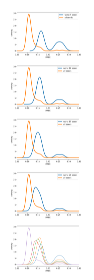

In [223]:
figure = plt.Figure(figsize=(20, 20))
kde5 = plt.imread('/home/dev/deepts/plot1/kde_func/kde_sample_seeds/kde_worst5.png')
kde10 = plt.imread('/home/dev/deepts/plot1/kde_func/kde_sample_seeds/kde_worst10.png')
kde15 = plt.imread('/home/dev/deepts/plot1/kde_func/kde_sample_seeds/kde_worst15.png')
kde20 = plt.imread('/home/dev/deepts/plot1/kde_func/kde_sample_seeds/kde_worst20.png')
kdeall = plt.imread('/home/dev/deepts/plot1/kde_func/kde_sample_seeds/kde_worst_all.png')



# hpad = np.zeros((deepar_elec.shape[0], 75, deepar_elec.shape[-1]))
 
row1 = np.vstack([kde5, kde10, kde15, kde20, kdeall])

 
# vpad = np.zeros((0, row1.shape[1], deepar_elec.shape[-1]))
 
plt.imshow(row1)
plt.axis("off")
plt.tight_layout()
plt.savefig("/home/dev/deepts/plot1/kde_func/kde_sample_seeds/kde_sample_progress.png", dpi=1000)

